# Multi Variable Linear Regression *Regularized* Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Prepare the data

 Create Train and Test dataframes,
 
 And add a columns with 1's to the free coefficient

In [2]:
df = pd.read_csv("ex1data3.txt", header=None, delim_whitespace=True)
#split the data
dfTrain = df[ :30]
dfTest = df[30 : ]
X = dfTrain.values[ : , : -1]
n = np.ones(len(X))
X = np.c_[n, X]
Y = dfTrain.values[ : , -1]

XTest = dfTest.values[ : , : -1]
n = np.ones(len(XTest))
XTest = np.c_[n, XTest]
YTest = dfTest.values[ : , -1]


## 2. Methods to prediction and find coefficients with OLS (Ordinary Least Squares)

In [3]:
def predict(row, coefs):
    ypred = coefs[0]
    for i in range(len(row)-1):
        ypred += coefs[i + 1] * row[i]
    return ypred

In [4]:
def coefs_OLS(X,Y, lambdas):
    I = np.identity(6)
    I[0,0] = 0
    inverse = np.linalg.inv( X.T.dot(X) + (lambdas * I ))
    coef = inverse.dot(X.T).dot(Y)
                            
    return coef

In [5]:
lambdas = np.array([0,1,2,3,4,5])
coef = coefs_OLS(X, Y , lambdas)
print(coef)

[ 0.33979846  1.34098496  0.17546788  0.05499766  0.02421955 -0.12377735]


## 3. Calculate Linear Regression with Regularization

### 3.1 Training Dataset

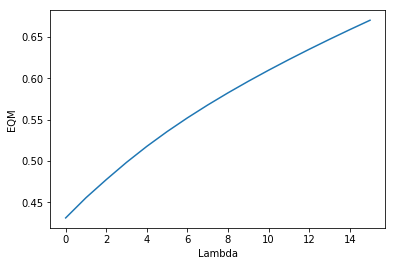

In [6]:
lambdas = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
list_lambd = []
list_eqm = []
for lambd in lambdas:
    coefs = coefs_OLS(X,Y, lambd)
    Ypred = X.dot(coefs)
    erro = Y - Ypred
    erroQuad = erro**2
    eqm = np.mean(erroQuad)
    list_lambd.append(lambd)
    list_eqm.append(eqm)
    
plt.plot(list_lambd, list_eqm)
plt.xlabel("Lambda")
plt.ylabel("EQM")
plt.show()

### 3.2 Test Dataset

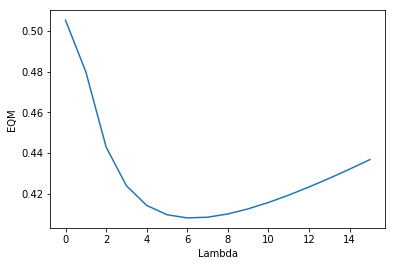

In [7]:
lambdas = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
list_lambd = []
list_eqm = []
for lambd in lambdas:
    coefs = coefs_OLS(X,Y, lambd)
    Yhat = XTest.dot(coefs)
    erro = YTest - Yhat
    erroQuad = erro**2
    eqm = np.mean(erroQuad)
    list_lambd.append(lambd)
    list_eqm.append(eqm)
    
plt.plot(list_lambd, list_eqm)
plt.xlabel("Lambda")
plt.ylabel("EQM")
plt.show()